In [7]:
import pandas as pd
import numpy as np

import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
%matplotlib inline

from dateutil.relativedelta import *
from datetime import datetime

# Progress bar
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pprint
pp = pprint.PrettyPrinter(indent=4)


LTC_BINARY = '../data/ltc_events_all_patients_ukbb45840.tsv'

In [8]:
ltc_patients = pd.read_csv(LTC_BINARY,sep = '\t',  parse_dates=['event_date'])


LTC_list = ltc_patients[["LTC", "LTC_abbrev"]].drop_duplicates()
pd.DataFrame(LTC_list).to_csv('../data/List_of_LTCs.csv', index=False)


ltc_patients.drop(labels=['read_2',
                          'age_at_event',
                          'YOB', 'sex', 
                          'count_per_LTC', 
                          'count_distinct_LTC', 
                          'LTC'], 
                    axis=1, inplace=True)

ltc_patients['LTC_abbrev'] = ltc_patients['LTC_abbrev'].astype("string")

ltc_patients.head(10)


,patient_id,event_date,LTC_abbrev
0,1000014,2004-09-06,PMR
1,1000014,2011-12-07,glaucoma
2,1000059,1995-10-27,OA
3,1000059,1998-01-09,OA
4,1000059,1999-05-24,OA
5,1000059,2002-01-08,skin_ulcer
6,1000059,2002-01-08,dermatitis
7,1000059,2005-07-10,erectile_dysfunction
8,1000059,2011-02-24,OA
9,1000059,2011-03-14,OA


In [9]:
ltc_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3110220 entries, 0 to 3110219
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   patient_id  int64         
 1   event_date  datetime64[ns]
 2   LTC_abbrev  string        
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 71.2 MB


In [10]:
print(len(ltc_patients['patient_id'].unique()))
print(len(ltc_patients))

210211
3110220


In [11]:
len(ltc_patients.loc[ltc_patients['event_date'] == max(ltc_patients['event_date'])])

19

In [12]:
ltc_patients.loc[ltc_patients['patient_id'] == 1095843]

,patient_id,event_date,LTC_abbrev
58532,1095843,1989-07-03,alcohol_depend
58533,1095843,1992-06-02,seb_derm
58534,1095843,1992-05-13,seb_derm
58535,1095843,1998-06-05,irritable_bowel_syndrome
58536,1095843,1999-04-21,seb_derm
58537,1095843,1999-04-08,dermatitis
58538,1095843,2004-10-06,alcohol_depend
58539,1095843,2004-10-06,allergic_rhinitis
58540,1095843,2037-07-07,dermatitis


In [16]:
#date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y')
#range(date.year, date1.year,(date1.year-date.year)/5)

date1 = ltc_patients.loc[58532, 'event_date'].date()
date2 = ltc_patients.loc[58540, 'event_date'].date()


f = [(date1 + relativedelta(years=round(i)-date1.year)).strftime("%Y-%m-%d") for i in np.linspace(date1.year, date2.year, 5)]
f.pop()
f.append((date2).strftime("%Y-%m-%d"))
#print(*range(date1.year, date2.year,int((date2.year-date1.year)/5)))
print("5 equidistant time points: {n}".format(n = np.linspace(date1.year, date2.year, 5)))
print("Date of first recorded diagnosis: {t1}".format(t1 = date1))
print("Date of last recorded diagnosis: {t2}".format(t2 = date2.year))
print("Length of entire timeline: {tm}".format(tm = date2.year-date1.year))
print("Example of split timeline: {ts}".format(ts = f))

5 equidistant time points: [1989. 2001. 2013. 2025. 2037.]
Date of first recorded diagnosis: 1989-07-03
Date of last recorded diagnosis: 2037
Length of entire timeline: 48
Example of split timeline: ['1989-07-03', '2001-07-03', '2013-07-03', '2025-07-03', '2037-07-07']


In [23]:
if date2 > datetime.now().date():
    print(date2)

2037-07-07


In [24]:
def keep_unique(list_n):
    list_n = set(list_n)
    list_n = list(list_n)
    return list_n

In [25]:
lop0 = [] # List of patient LTCs at time[0]
lop1 = [] # List of patient LTCs before time[1]
lop2 = [] # List of patient LTCs before time[2]
lop3 = [] # List of patient LTCs before time[3]
lop4 = [] # List of patient LTCs before time[4]

patients = ltc_patients['patient_id'].unique()
delta_t = 5

print("Number of patients: {n}".format(n=len(patients)))

# For every unique patient
for patient in tqdm(patients):
    
    temp = ltc_patients[ltc_patients['patient_id']==patient]

    index = 0
    patient_timeline = []
    list0 = [] # List of patient LTCs at time[0]
    list1 = [] # List of patient LTCs before time[1]
    list2 = [] # List of patient LTCs before time[2]
    list3 = [] # List of patient LTCs before time[3]
    list4 = [] # List of patient LTCs before time[4]

    for _, row in temp.iterrows():
        
        # Skip unless the patient_id = patient
        if (row['patient_id'] != patient):
            continue

        else:
            # Get the the date of the first and last diagnosis
            if index == 0:
                date1 = row['event_date'].date()
                index+=1

            else:
                date2 = row['event_date'].date()
                index+=1
    if date2 <= datetime.now().date():
        
        patient_timeline = [(date1 + relativedelta(years=round(i)-date1.year)).strftime("%Y-%m-%d") for i in np.linspace(date1.year, date2.year, 5)]
        patient_timeline.pop()
        patient_timeline.append((date2).strftime("%Y-%m-%d"))

        for _, row in temp.iterrows():

                if (row['event_date'].strftime("%Y-%m-%d")) == patient_timeline[0]:
                    list0.append(row['LTC_abbrev'])

                if (row['event_date'].strftime("%Y-%m-%d")) <= patient_timeline[1]:
                    list1.append(row['LTC_abbrev'])

                if (row['event_date'].strftime("%Y-%m-%d")) <= patient_timeline[2]:
                    list2.append(row['LTC_abbrev'])

                if (row['event_date'].strftime("%Y-%m-%d")) <= patient_timeline[3]:
                    list3.append(row['LTC_abbrev'])

                if (row['event_date'].strftime("%Y-%m-%d")) <= patient_timeline[4]:
                    list4.append(row['LTC_abbrev'])
    
    list0 = keep_unique(list0)
    list1 = keep_unique(list1)
    list2 = keep_unique(list2)
    list3 = keep_unique(list3)
    list4 = keep_unique(list4)
    
    if len(list4) >= 4:
        lop0.append(list0)
        lop1.append(list1)
        lop2.append(list2)
        lop3.append(list3)
        lop4.append(list4)


Number of patients: 210211


  0%|          | 0/210211 [00:00<?, ?it/s]

In [26]:


pp.pprint(len(lop0))
pp.pprint(len(lop1))
pp.pprint(len(lop2))
pp.pprint(len(lop3))
pp.pprint(len(lop4))

142490
142490
142490
142490
142490


In [31]:
all_len = 0

for text in lop4:
    all_len += len(text)
    
avg_len = all_len/len(lop4)

print("All words: {n}".format(n=all_len))
print("Average LTCs per patient: {n}".format(n=avg_len))
print("Maximum amount of LTCs: {n}".format(n= max(len(x) for x in lop4)))
print("Patients in corpus: {l}".format(l=len(lop4)))
print("Example of patient record at t1:\n {n}".format(n=lop0[2]))
print("Example of patient record at t3:\n {n}".format(n=lop2[2]))
print("Example of patient record at t5:\n {n}".format(n=lop4[2]))


All words: 1096631
Average LTCs per patient: 7.6961962242964415
Maximum amount of LTCs: 37
Patients in corpus: 142490
Example of patient record at t1:
 ['cystic_renal']
Example of patient record at t3:
 ['hypertension', 'gout', 'ESRD', 'allergic_rhinitis', 'enthesopathy', 'cystic_renal']
Example of patient record at t5:
 ['CKD', 'hypertension', 'gout', 'cholelithiasis', 'ESRD', 'hearing_loss', 'thyroid', 'atrial_fibrilation', 'allergic_rhinitis', 'epilepsy', 'pri_skin', 'enthesopathy', 'pri_other', 'cystic_renal', 'venous_thromb']


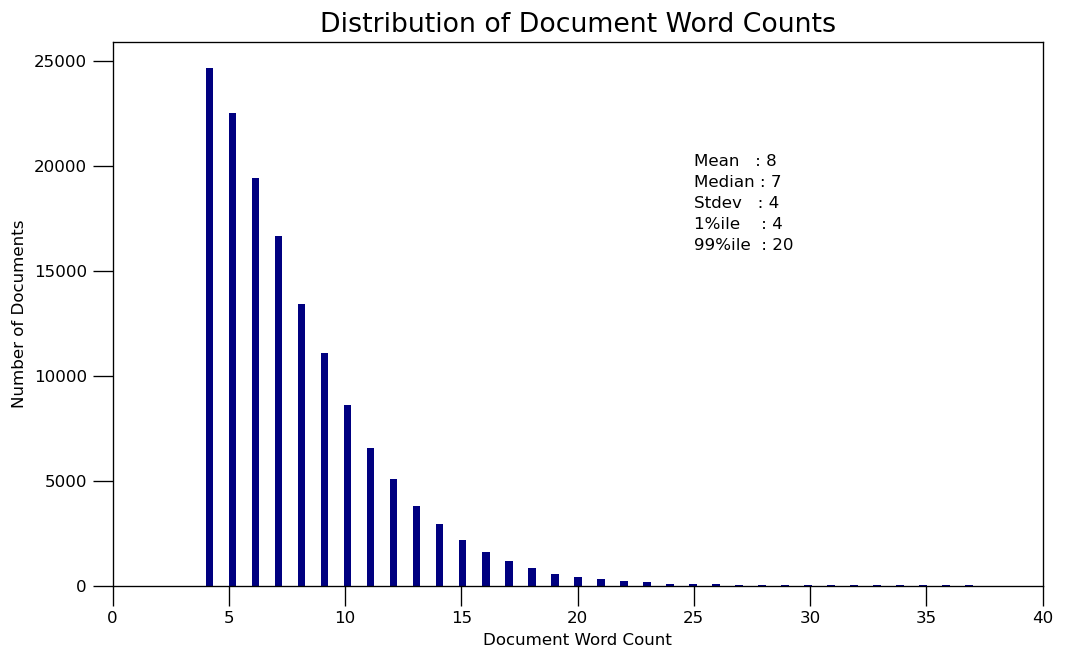

In [29]:
doc_lens = [len(d) for d in lop4]

# Plot
plt.figure(figsize=(10,6), dpi=120)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(25, 20000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(25,  19000, "Median : " + str(round(np.median(doc_lens))))
plt.text(25,  18000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(25,  17000, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(25,  16000, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 40), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=12)
plt.xticks(np.linspace(0,40,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=16))
plt.show()

In [ ]:
def find_dominant_topics(ldamodel=None, corpus=corpus, texts=list_of_patients):
    
    dom_topics = pd.DataFrame()

    # Get main topic for each patient
    for i, row_list in enumerate(ldamodel[corpus]):
        
        if ldamodel.per_word_topics:
            row = row_list[0]
        else:
            row = row_list
        #print(row)
        
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each patient
        for j, (topic_num, prop_topic) in enumerate(row):
            
            # If dominant topic
            if j == 0:
                
                wp = ldamodel.show_topic(topic_num)
                
                topic_keywords = ", ".join([word for word, prop in wp])
                
                dom_topics = dom_topics.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
                
    dom_topics.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original patient record to the end of the output
    contents = pd.Series(texts)
    dom_topics = pd.concat([dom_topics, contents], axis=1)
    
    return dom_topics


temp = find_dominant_topics(ldamodel=lda_model, corpus=corpus, texts=list_of_patients)

# Format
dominant_patient_topics = temp.reset_index()
dominant_patient_topics.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
dominant_patient_topics.head(10)